# Social Distancing and Hospital Capacity for coronavirus

There was a **great** Washington Post [article](https://www.washingtonpost.com/graphics/2020/world/corona-simulator/) on social distancing. It comes with simulations to show you the effect of different measures, and I think it's fantastic #SciCom. I want to talk it over with my kids, but I want to be ready for them to ask questions like "what if we did (some cool other idea) for social distancing?" I also [thought this would be useful for classes](https://twitter.com/mglerner/status/1239740748062511106) like intro physics, data science, computational modeling, etc., especially if those classes can team up with humanities, arts, etc. So, I want to have some Python code to replicate it and play with.

I put the Python code on [github](https://github.com/mglerner/covid) so that it's easy to grab and play with. I like having notebooks as standalone things, so all of the relevant code from when I wrote this up is also at the end of the notebook. I tried to make the code basic enough that it's easy to add different models yourself; please do so!

<!-- TEASER_END -->

In [1]:
from matplotlib import pyplot as plt
from IPython.display import HTML
import imp

In [ ]:
from covid import social_distancing
from covid.social_distancing import Universe, getanim, draw_stacked_plot

This is all based on a classic model called the SIR model, in which people can either be "succeptible" to getting the disease (S), "infected" (I), or "recovered" (R). Recovered people are considered immune from the disease

There are lots of modifications you can make to that model, and you can google for them. 

Let's start with a model like the one in the Washington Post article: a town of about 200 people that starts with one or two sick people. How long does it take for everyone to get infected? How long for everyone to recover?

Here's a first pass at it. Each person is represented by a dot. The blue dots are healthy (S for "succeptible") people. The red dots are sick people (I), and the green dots are recovered (R) people.

We'll make one change from the Washington Post model right from the beginning: if you get sick, there's a chance you'll die. Figuring out that chance is tricky, but it seems like 2% is a good estimate. So the dots will turn dark blue when people die.

In [3]:
npeople, nsteps = 200, 400
initial_infection_chance = 1.5/200

In [71]:
%%capture
u = Universe(npeople,
             initial_infection_chance=initial_infection_chance,
            )
u.run(nsteps)
anim0 = getanim(u,show_capacity=False)

In [72]:
u.data.i[0],u.data.d[-10:]

(2.0, array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]))

In [73]:
HTML(anim0.to_html5_video())

(In case it's not obvious in your browser, that thing above is a movie. If you hover over it, you should have a button to play it. All of the plots that look like it below are also movies.)

You probably notice two things:

### Basically everyone gets infected. 

That red shape is the curve people talk about when they say #FlattenTheCurve.

### It doesn't look like a lot of people died. 

You can barely see the dark blue bit showing up at the top of the plot. If you look at the dots, you might not even have noticed the five dots that turned dark blue and stopped moving. But those five dots represent 2.5% of the population. If we scale this model up to the US population of 330 million, 2.5% is 8.5 million people dead!

Luckily, this model probably doesn't scale up perfectly to the whole US. But that's a worst case scenario of "what if we did nothing" and it's terrible.

## Social Distancing

So what can we do? One idea is social distancing or social isolation. That's the idea that you just stay at home and don't interact with people. How much can that help? Let's follow the Washington Post article and see what happens if 25% of people isolate.

In [80]:
%%capture
u = Universe(npeople,distancing=0.25,
             initial_infection_chance=initial_infection_chance,
            )
u.run(nsteps)
anim25 = getanim(u,show_capacity=False)

In [81]:
u.data.i[0],u.data.d[-10:]

(1.0, array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]))

In [82]:
HTML(anim25.to_html5_video())

That made almost no perceptible difference! 

A bit about models like this: you should look at the general trends. Here, you can see that the shape of the red curve is about the same. The model uses a lot of randomness, so running it 100 times will give 100 different results. Looking for exact values of small numbers (e.g. the exact number of deaths) isn't going to be as informative. For better estimates of that, you want to run this with a larger population, and you want to run it for longer. We'll stick to qualitative results.

### What if 50% of people distance?

In [83]:
%%capture
u = Universe(npeople,distancing=0.5,
             initial_infection_chance=initial_infection_chance,
            )
u.run(nsteps)
anim50 = getanim(u,show_capacity=False)

In [84]:
u.data.i[0],u.data.d[-10:]

(4.0, array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]))

In [85]:
HTML(anim50.to_html5_video())

Oof. Again, it's about the same, though you can see some difference in that some people are not actually getting infected!

### What if 75% of people distance?

This has got to be better, right?

In [101]:
%%capture
u = Universe(npeople,distancing=0.75,
             initial_infection_chance=initial_infection_chance,
            )
u.run(nsteps)
anim75 = getanim(u,show_capacity=False)

In [102]:
u.data.i[0],u.data.d[-10:]

(2.0, array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))

In [103]:
HTML(anim75.to_html5_video())

That's definitely better, but not perfect. What if we had really extreme distancing?

### What if 90% of people distance?

In [159]:
%%capture
u = Universe(npeople,distancing=0.9,
             initial_infection_chance=initial_infection_chance,
            )
u.run(nsteps)
anim = getanim(u,show_capacity=False)

In [160]:
u.data.i[0],u.data.i[-10:],u.data.d[-10:]

(2.0,
 array([15., 15., 15., 15., 14., 14., 14., 14., 14., 14.]),
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]))

In [161]:
HTML(anim.to_html5_video())

That flattens the curve for a lot longer, and gives people a lot longer to deal with things.

But we're also clearly not done with the pandemic, as there are still infected people in the population. What if we run that for longer?

In [210]:
%%capture
u = Universe(npeople,distancing=0.9,
             initial_infection_chance=initial_infection_chance,
            )
u.run(nsteps*2)
anim = getanim(u,show_capacity=False)

In [211]:
u.data.i[0],u.data.i[-10:],u.data.d[-10:]

(4.0,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]))

In [212]:
HTML(anim.to_html5_video())

So, if we could do an essentially perfect job of social distancing until the disease was eradicated, we win. That's a tough sell, though, because I'm reading estimates that the time required for complete eradication could be much longer than 3-4 months. Like 12-18 months. And we haven't even thought about hospital capacity.

## What about hospital capacity?

What if we run out of hospital beds? In that case, obviously more people are going to die. The estimates of mortality rates when we have hospital capacity seem to range quite a bit, but 2% seems like a good estimate (I'm not linking to any sources here because things keep changing. Feel encouraged to download the code and re-run things yourself if you want a different estimate!).

The overall mortality rate *without* hospitals seems more like 5%. That's not a factor of 10 or anything, but it's quite a bit. And it becomes a bigger difference if hospitals get better at treating patients.

**What's our capacity?** Googling around, it looks like we have a hospital capacity of around 3 beds per 1000 people in the US.

**Bigger population:** in order to see this, we're going to want a bigger population! Both in terms of having a large enough population to see the capacity matter, and so differences of 1-2 people don't make such a difference. That means things will take longer to compute. Drawing the awesome animation actually takes a long time, so **I'm just going to show the charts you saw on top of those figures, pre-drawn, with no animations for the rest of this.** Hopefully that makes sense at this point, since you've seen several animations.

So here's the nobody-does-anything plot, original size. The dashed line at the bottom is the hospital capacity. In this case, here are the exact numbers: 
* with 3 beds per 1000 people, that's 0.6 beds for our 200 people. 
* We expect 5% of sick people to need beds. That means that, out of 20 sick people, one of them is expected to need a bed. So, if we're just talking about corona virus, we need one bed for every 20 sick people. One bed means we can handle 20 sick people. Two beds means we can handle 40 sick people. 0.6 beds means we can handle 20\*0.6 = 12 sick people. So the dashed line in the chart below is at 12 people

In [214]:
npeople = 200
initial_infection_chance = 1.5/100

4.0% of people died in the figure below


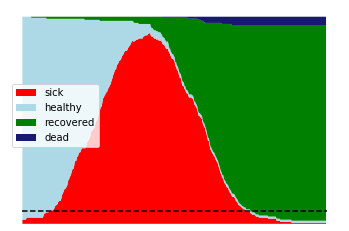

In [215]:
u = Universe(npeople=npeople,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003,
            )
u.run(nsteps)
draw_stacked_plot(u,show_capacity=True,print_description=True)

**NOTE** if you want to know the percentage of people who died in the above simulation, you can see it in text right below the `Python` code/right above the figure. This one says "4% of people died in the figure below". You'll see a similar bit of text on all of the next figures, but it's kind of hard to see, and I'm not great at text formatting.

And now with 1000 people

In [216]:
npeople = 1000
initial_infection_chance = 1.5/100

5.6% of people died in the figure below


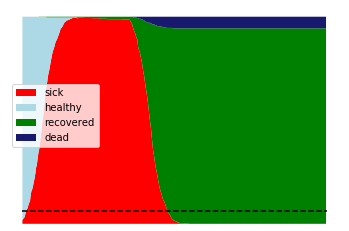

In [217]:
u = Universe(npeople=npeople,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003,
            )
u.run(nsteps)
draw_stacked_plot(u,show_capacity=True,print_description=True)

You can see the awful trend there: the number of deaths starts going up dramatically once everyone is sick and the hospitals are over capacity. This only becomes more pronounced when hospitals get better at treating people!

Let's say we start a bit later, with 5% of the population infected. That's probably not a terrible guess. Given our lack of testing, it could even be higher than that.

In [218]:
initial_infection_chance = 0.05

5.0% of people died in the figure below


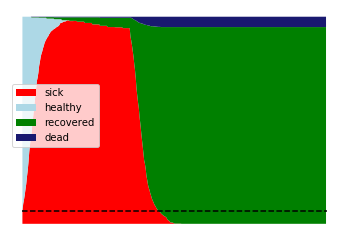

In [219]:
u = Universe(npeople=npeople,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003,
            )
u.run(nsteps)
draw_stacked_plot(u,show_capacity=True,print_description=True)

That's bad. 

### Does distancing help?

What if we have moderate social distance of 50%?

4.1% of people died in the figure below


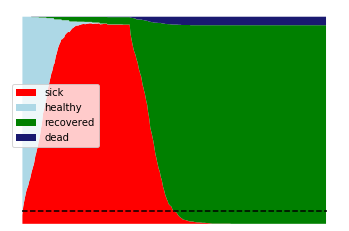

In [220]:
u = Universe(npeople=npeople,distancing=0.5,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003,
            )
u.run(nsteps)
draw_stacked_plot(u,show_capacity=True,print_description=True)

And what if we have extreme distancing of 90%?

3.5% of people died in the figure below


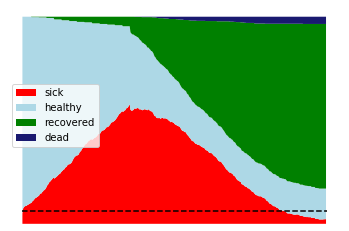

In [221]:
u = Universe(npeople=npeople,distancing=0.9,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003,
            )
u.run(nsteps)
draw_stacked_plot(u,show_capacity=True,print_description=True)

And, just as a reminder, 5% of the US population is 16 *million* people. If pure social distancing saves 1%, that's  about 3 *million* people we would save. As a side note, I think the numbers from my simulations are higher than the ones I'm seeing because I'm modeling lots of worst-case scenarios.

## What if we build more beds

We could certainly do something like mobilize the Army Corps of Engineers to build a bunch of hospitals. That's what other countries did a *while* ago. What if we increased our hospital capacity by a factor of 5? I'm guessing that's reasonable because we don't need great multi-purpose hospitals. We need temporary stuff for one particular purpose. Maybe this includes the navy hospitals? Maybe it includes repurposed dorm rooms? I'm hoping. But I'm not a civil engineer; I could be wrong here.

2.2% of people died in the figure below


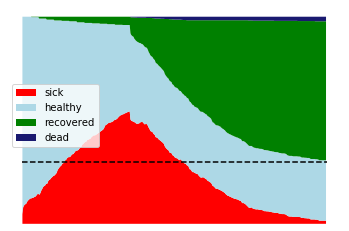

In [222]:
u = Universe(npeople=npeople,distancing=0.9,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003*5,
            )
u.run(nsteps)
draw_stacked_plot(u,show_capacity=True,print_description=True)

So that's **way** better. Not perfect, but way better.

## What if people stop distancing?

### With 5x the capacity

The above assumes we keep distancing until basically everyone's recovered. What if we build these beds, and people stop distancing when it looks like the curve is going down?

3.7% of people died in the figure below


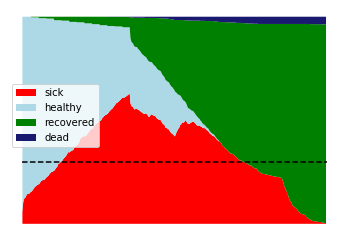

In [223]:
u = Universe(npeople=npeople,distancing=0.9,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003*5,
            )
u.run(nsteps,stop_distancing_at = int(nsteps*0.5))
draw_stacked_plot(u,show_capacity=True,print_description=True)

So that's bad, it's still an improvement ofer not distancing, but it's bad.

### With 2x the capacity
What if we don't get a 5x extra capacity? What if we do something (still seemingly awesome), like double our capacity instead?

**Here's with no distancing**

5.9% of people died in the figure below


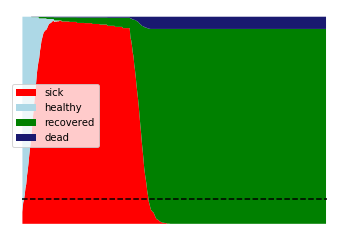

In [224]:
u = Universe(npeople=npeople,distancing=0.0,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003*2,
            )
u.run(nsteps,stop_distancing_at = int(nsteps*0.5))
draw_stacked_plot(u,show_capacity=True,print_description=True)

**Here's with extreme distancing**

3.4% of people died in the figure below


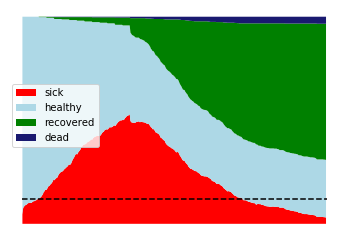

In [225]:
u = Universe(npeople=npeople,distancing=0.9,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003*2,
            )
u.run(nsteps)
draw_stacked_plot(u,show_capacity=True,print_description=True)

And here's with extreme distancing that stops early

3.6% of people died in the figure below


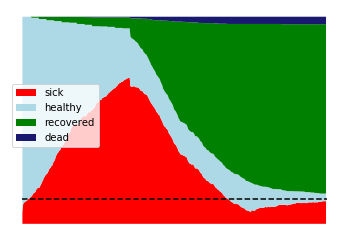

In [228]:
u = Universe(npeople=npeople,distancing=0.9,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003*2,
            )
u.run(nsteps,stop_distancing_at=nsteps*0.75)
draw_stacked_plot(u,show_capacity=True,print_description=True)

Again, now we've flattened the curve, and we need to run for longer. You can't quite tell, because I'm not showing time on the x-axis, but here's running that for twice as long.

4.9% of people died in the figure below


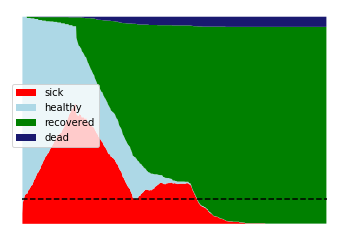

In [229]:
u = Universe(npeople=npeople,distancing=0.9,
             initial_infection_chance=initial_infection_chance,
             hospital_beds_fraction=0.003*2,
            )
u.run(nsteps*2,stop_distancing_at=nsteps*0.75)
draw_stacked_plot(u,show_capacity=True,print_description=True)

In the first of those simulations, we happened to stop distancing after we were actually under capacity. That seems to make a noticeable distance. But either way, it's not great.

## Conclusions

Can I make any conclusions from this? Even though this isn't a quantitatively correct model, I think a few things are probably true:

1. We need to increase our hospital capacity. This means mobilizing the Army Corps of Engineers, using the navy hospital ships, maybe repurposing college dorms, etc. It also means obtaining more personal protective equipment, so that our health care workers can continue to work with proper protection! If they get sick, our capacity decreases hugely!
2. We need to look aggressively for cures or vaccines. I see reports that some malaria drugs might treat coronavirus within a few days in a hospital setting. That's huge.
3. #FlattenTheCurve, by itself, is only a complete solution if you can do it *super* aggressively, and basically forever (until everyone has been exposed). But flattening the curve *now* while we do things like building more beds and looking for cures is a huge win!

Seems like we'd be best off flattening the curve for as long as society can stand, while pushing hard at capacity and cures.

<hr>

<br>
<br>

## Running it yourself

If you want to run it yourself, here's the code. Instead of 

```python
from covid import social_distancing
from covid.social_distancing import Universe, getanim, draw_stacked_plot
```

up top, just run the cell below.

If you're playing around with the code, here are some things to note:

* Generating the animation is much slower than generating the data. So maybe just make the stacked plots if you're looking for trends.
* Units and parameterization are tricky. I made very little effort to get the physical distances/movement right.
* I had to re-run the cells a bunch to get similar starting conditions. That's what you get with randomness. You could think about modifying things so that we had a fixed number of infected people at the beginning. Or a fixed number of days those folks had been infected. You could also explicitly seed the random number generator for consistency.
* One that you might want make if you play around with the model is letting people transition from R back to S, since there have been some reports of people getting *reinfected* with the disease. Eek!

In [2]:
import numpy as np, scipy as sp, pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import animation
from IPython.display import HTML
from itertools import combinations
from collections import namedtuple

"""
Units: time is measured in 12 hour chunks, but there's no strict correspondence to units here.
"""

class EffectiveArea:
    """Tells us the boundaries of the area that people can live in.
    """
    def __init__(self,):
        self.xmin, self.xmax = 0, 20
        self.ymin, self.ymax = 0, 20

class Person:
    """
    In this version, after 14 days, you either recover or die
    """
    def __init__(self,effectivearea,state='succeptible',distancing=False):
        self.r = 0.15
        self.days_infected = 0
        self._typical_recovery_days = 14
        self.mortality_rate = {True:0.05,False:0.02} # index is whether we're over capacity
        self.distancing = distancing
        if self.distancing:
            self.m = 1000
        else:
            self.m = 1
        self.state = state
        if self.state == 'infected':
            self.days_infected = np.random.randint(self._typical_recovery_days)
        self.ea = effectivearea
        self.x, self.y = np.random.uniform(self.ea.xmin,self.ea.xmax), np.random.uniform(self.ea.ymin,self.ea.ymax)
        if self.distancing:
            self.distance(force=True)
        else:
            self.undistance(force=True)
    def distance(self,force=False):
        if force or not self.distancing:
            self.m = 1000
            self.vx, self.vy = 0,0
            self.distance = True
    def undistance(self,force=False):
        if force or self.distancing:
            self.m = 1
            self.vx, self.vy = np.random.normal(size=2) # Maxwell Boltzmann?
            self.distancing = False
    def move(self,dt,ea,overcapacity=False):
        self.x, self.y = self.x + self.vx*dt, self.y + self.vy*dt
        
        """People don't recover instantly. Once it's been two weeks, 
        they start getting a chance to recover. We could also give 
        them a chance to die here.
        """
        if self.state == 'infected':
            if self.days_infected < self._typical_recovery_days:
                self.days_infected += dt
            else:
                if np.random.uniform() < self.mortality_rate[overcapacity]:
                    self.state = 'dead'
                    self.m = 1000
                    self.vx, self.vy = 0,0
                else:
                    self.days_infected = 0
                    self.state = 'recovered'
    
def collide(p1,p2):
    """This is the 2D elastic collision problem from your intro physics book.
    """
    if p1.state == 'infected' and p2.state == 'succeptible':
        p2.state = 'infected'
    elif p2.state == 'infected' and p1.state == 'succeptible':
        p1.state = 'infected'

    m1, m2 = p1.m, p2.m
    r1, r2 = np.array([p1.x,p1.y]), np.array([p2.x,p2.y])
    v1, v2 = np.array([p1.vx,p1.vy]), np.array([p2.vx,p2.vy])
    M = m1 + m2
    d = np.linalg.norm(r1 - r2)**2
    u1 = v1 - 2*m2 / M * np.dot(v1-v2, r1-r2) / d * (r1 - r2)
    u2 = v2 - 2*m1 / M * np.dot(v2-v1, r2-r1) / d * (r2 - r1)
    p1.vx,p1.vy = u1
    p2.vx,p2.vy = u2

    
class Universe:
    def __init__(self,
                 npeople, # How many people there are in the world
                 initial_infection_chance=0.1, # Initial fraction of population which is infected
                 distancing=0.0, # Fraction of population which practices distancing
                 hospital_beds_fraction = 1.0 # Better is 0.003 which is closer to reality
                ):
        self.npeople = npeople
        self.ea = EffectiveArea()
        self.dt = 0.1
        self.hospital_beds_fraction = hospital_beds_fraction
        self.hospital_beds = npeople*hospital_beds_fraction
        self.data = None # gets set in self.run
        def _state():
            if np.random.uniform() < initial_infection_chance:
                return 'infected'
            return 'succeptible'
        def _distancing():
            return np.random.uniform() < distancing
        self.people = [Person(self.ea,_state(),_distancing()) for i in range(self.npeople)]
        # self.color = {'succeptible':0.5,'infected':0.0,'recovered':0.7} # old color scheme
        self.color = {'succeptible':'lightblue','infected':'red','recovered':'green','dead':'midnightblue'}
        
    def _step(self):
        """iterate through one timestep
        """
        points = list(zip([p.x for p in self.people],[p.y for p in self.people]))
        dists = euclidean_distances(points,points)
        close = dists < 2*self.people[0].r
        close = close.tolist()
        for (i,j) in combinations(range(self.npeople),2):
            if close[i][j]: # a bit faster than numpy indexing once things get big.
                collide(self.people[i],self.people[j])
                
        # Are we over capacity?
        ninfected = len([p for p in self.people if p.state == 'infected'])
        # about 5% need hospitalization
        overcapacity = 0.05 * ninfected > self.hospital_beds
        for p in self.people:
            p.move(self.dt,self.ea,overcapacity)
            if p.x <= self.ea.xmin or p.x >= self.ea.xmax: 
                p.vx = -p.vx
            if p.y <= self.ea.ymin or p.y >= self.ea.ymax:
                p.vy = -p.vy
    
    def run(self,steps,stop_distancing_at = None):
        """Run a simulation
        
        Internal data looks like
        
        ```
        x_coords[frame,particle_number]
        ```
        """
        x_coords = np.zeros((steps,len(self.people)))
        y_coords = np.zeros((steps,len(self.people)))
        state = np.zeros((steps,len(self.people)),dtype='object')
        
        # SIR model. `i` is a questionable variable name TBH
        s,i,r,d = np.zeros(steps),np.zeros(steps),np.zeros(steps),np.zeros(steps)
        def pop_count(people):
            s,i,r,d = 0,0,0,0
            for p in people:
                if p.state == 'succeptible':
                    s += 1
                elif p.state == 'infected':
                    i += 1
                elif p.state == 'recovered':
                    r += 1
                elif p.state == 'dead':
                    d += 1
                    
            return s,i,r,d
        s[0],i[0],r[0],d[0] = pop_count(self.people)
        x_coords[0] = [p.x for p in self.people]
        y_coords[0] = [p.y for p in self.people]
        state[0] = [p.state for p in self.people]
        
        for step in range(1,steps):
            if step == stop_distancing_at:
                for p in self.people:
                    p.undistance()
            self._step()
            s[step],i[step],r[step],d[step] = pop_count(self.people)
            x_coords[step] = [p.x for p in self.people]
            y_coords[step] = [p.y for p in self.people]
            state[step] = [p.state for p in self.people]
        dtype = namedtuple('RunData',['x','y','state','s','i','r','d','steps'])
        self.data = dtype(x_coords,y_coords,state,s,i,r,d,steps)
        
    def draw(self,ax=None):
        """
        A very simple method to draw the current state. Better graphing comes in the
        animation functions.
        """
        if ax is None:
            fig,ax = plt.subplots(figsize=(5,5))
        scat = ax.scatter([p.x for p in self.people],[p.y for p in self.people],
                   c = [self.color[p.state] for p in self.people],
                   marker='.')
        return scat,



def getanim(u,show_capacity=True):
    fig,ax = plt.subplots(figsize=(6,6))
    ax.axis('off')

    left, width = 0.1, 0.85
    bottom, height = 0.1, 0.65
    spacing = 0.02

    rect_universe = [left, bottom, width, height]
    rect_trend = [left, bottom + height + spacing, width, 0.2]

    ax_universe = plt.axes(rect_universe)
    ax_trend = plt.axes(rect_trend)
    #ax_universe.axis('off') # I want the box around it.
    ax_universe.axes.get_xaxis().set_ticks([])
    ax_universe.axes.get_yaxis().set_ticks([])    
    ax_trend.axis('off')

    s,i,r,d = u.data.s,u.data.i,u.data.r,u.data.d

    line, = draw_stacked_plot(u,ax_trend,show_time=True,show_capacity=show_capacity)

    #ax_trend.stackplot(range(len(s)), i, s, r, d, labels=['sick','healthy','recovered','dead'],
    #                   colors=[u.color['infected'],u.color['succeptible'],u.color['recovered'],u.color['dead']])

    scat, = u.draw(ax_universe)
    
    def drawframe(i):
        data = np.column_stack(([u.data.x[i],u.data.y[i]]))
        scat.set_offsets(data)
        colors = np.array([u.color[_] for _ in u.data.state[i]])
        scat.set_color(colors)

        #_s,_i,_r = np.zeros(len(u.data.s)),np.zeros(len(u.data.s)),np.zeros(len(u.data.s))
        #_s[:i],_i[:i],_r[:i] = u.data.s[:i],u.data.i[:i],u.data.r[:i]
        #ax_trend.stackplot(range(len(_s)), _s, _i, _r, labels=['s','i','r'],colors=['blue','green','yellow'])
        #ax_trend.legend(loc='upper left')
        line.set_data([i,i],[0,u.npeople])

        return scat,line


    anim = animation.FuncAnimation(fig, drawframe, frames=u.data.steps,
                                  interval=20, blit=False, repeat=False)
    return anim



def draw_stacked_plot(u,ax=None,show_time=False,show_capacity=True,print_description=False):
    if ax is None:
        fig,ax = plt.subplots()
        ax.axis('off')
    s,i,r,d = u.data.s,u.data.i,u.data.r,u.data.d
    if print_description:
        print(f'{100*d[-1]/u.npeople}% of people died in the figure below')
    ax.stackplot(range(len(s)), i, s, r, d, labels=['sick','healthy','recovered','dead'],
                     colors=[u.color['infected'],u.color['succeptible'],u.color['recovered'],u.color['dead']])
    ax.legend(loc='center left')
    if show_capacity:
        ax.hlines(y=u.hospital_beds*20,xmin=0,xmax=len(s),linestyle='dashed')
    if show_time is True:
        line, = ax.plot([0,0],[0,s[0]+i[0]+r[0]+d[0]],linestyle='dashed',color='black')
        return line,
    return